# LAB 3-Online_shopper_Call backs_cm_Regularization_Optimization

## Objectives of the LAB:
1. Introduce a variety of call backs, plotting, file and history saving, viewing weights of layers and performance metrics.
2. Perform regularization and Batch normalization.
3. Evaluate performace of the models.
4. Compare performance of the models

## 1. Importing Libraries and mounting drive

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
from tensorflow import keras
from keras import utils as np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 2. Loading and Preparing Dataset

In [165]:
train_df = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/nopynospy/apu_deep_learning/main/online%20shop_test.csv')

In [166]:
train_df.shape

(16626, 13)

In [167]:
test_df.shape

(2466, 13)

In [168]:
# Split dataset to independent (X) and target (y) variables
X_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
X_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
# One-hot encoding the target variables from the training, validation and test datasets for classification
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=None, dtype="int")
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=None, dtype="int")
# Clearing the nodes left behind in the previous session to free up memory and preventing slowdown.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# 4. Misc features
## 4.1 Layer Weights

In [169]:
def add_base_layer(classifier, units, option):
  if option == 0:
    classifier.add(Dense(units = units, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12))
  elif option == 1:
    classifier.add(Dense(units= units , kernel_initializer = 'he_uniform', activation = 'relu'))
  else:
    classifier.add(Dense(units = units, kernel_initializer = 'he_uniform', activation = 'softmax'))
  return(classifier)

def create_baseline():
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    add_base_layer(classifier, 512, 0)
    # Second layer
    add_base_layer(classifier, 128, 1)
    # classifier.add(Dense(units= 128 , kernel_initializer = 'he_uniform', activation = 'relu'))
    add_base_layer(classifier, 96, 1)
    # classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    add_base_layer(classifier, 2, 2)
    # classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
   
    # Compiling Neural Network
    ## specifying optimizer 
    ## This is the metaparameter, specfiying the metaparameter , (adam is popular optimizer like SGD, and GD, 
    ## the binary_corssentropy is because it has 2 class)
    
    
    # classifier.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model_baseline = create_baseline()
print(model_baseline.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6656      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 194       
Total params: 84,898
Trainable params: 84,898
Non-trainable params: 0
_________________________________________________________________
None


In [170]:
hidden1 = model_baseline.layers[1]
weights, biases = hidden1.get_weights()
weights

array([[ 0.04067964, -0.00336043,  0.09331302, ...,  0.00245792,
         0.09733552, -0.08533823],
       [ 0.06069423,  0.09338554,  0.09013639, ..., -0.05562919,
        -0.09915592, -0.07003643],
       [-0.03871035,  0.06407639, -0.04704274, ...,  0.08028995,
        -0.03738622,  0.0967179 ],
       ...,
       [-0.09992407,  0.05533648,  0.05717779, ...,  0.03523437,
        -0.00272727, -0.05270342],
       [-0.07520302, -0.04225121, -0.03619627, ..., -0.06922771,
        -0.03622319, -0.00147122],
       [-0.03755522, -0.06533077, -0.0409788 , ...,  0.05789558,
        -0.04246469,  0.01773887]], dtype=float32)

Save the entire model to a HDF5 file.

The '.h5' extension indicates that the model should be saved to HDF5.

(In this case, to not be only limited to Google Colab and drive, I downloaded it)

In [171]:
# model_baseline.save('lab3_baseline.h5')

# from google.colab import files
# files.download('lab3_baseline.h5')

## 4.3 Restoring saved model and history

(Behind the scenes, I uploaded the downloaded h5 file to my GitHub)

In [172]:
!git clone https://github.com/nopynospy/apu_deep_learning.git

fatal: destination path 'apu_deep_learning' already exists and is not an empty directory.


In [173]:
!cd apu_deep_learning/
!ls

apu_deep_learning  lab3_baseline.h5  sample_data


In [174]:
model = keras.models.load_model('lab3_baseline.h5')

# 4.2 Callbacks

## 4.4 Early stopping call back
Setting the early stopping monitor so the model stops training when it won't improve anymore

In [175]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [176]:
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history = model.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping_monitor], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 3ms/step - loss: 0.6658 - accuracy: 0.8174 - val_loss: 1.6163 - val_accuracy: 0.4092
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8471 - val_loss: 0.3885 - val_accuracy: 0.8670
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3691 - accuracy: 0.8557 - val_loss: 0.7335 - val_accuracy: 0.7246
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3607 - accuracy: 0.8575 - val_loss: 0.5503 - val_accuracy: 0.7676
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3591 - accuracy: 0.8546 - val_loss: 0.8801 - val_accuracy: 0.6250
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8561 - val_loss: 0.5019 - val_accuracy: 0.8083
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8568 - val_loss: 0.6871 - val_accuracy: 0.6084
Epoch 

## 4.5 Plots

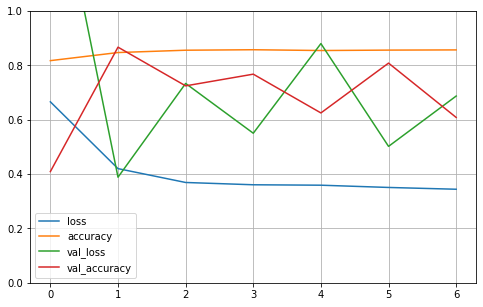

In [178]:
# to plot one of the performance metrics
from matplotlib import pyplot
from PIL import Image

def plot_acc_loss(hist):
  pd.DataFrame(hist.history).plot(figsize=(8, 5))
  plt.grid(True)
  plt.gca().set_ylim(0, 1)
  plt.show()

plot_acc_loss(history)

val_loss: 0.6871 - val_accuracy: 0.6084 are results that need improvement

## Evaluation Metrics

In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
def evaluation_metrics(y_pred, y_pred_proba, y_test):
  # Confusion Matrix
  print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
  # Accuracy
  print('\nAccuracy:\n', accuracy_score(y_test, y_pred))
  # Recall
  print('\nRecall:\n', recall_score(y_test, y_pred))
  # Precision
  print('\nPrecision:\n', precision_score(y_test, y_pred))
  # F1-score
  print('\nF1-score:\n', f1_score(y_test, y_pred))
  # ROC AUC
  auc = roc_auc_score(y_test, y_pred_proba[:, 1])
  print('\nROC AUC:\n', auc)

# Model Predictions

In [189]:
def make_prediction(model, X_test):
  # Getting the model probability predictions based on the test data
  y_pred_proba = model.predict(X_test)
  print('Probabilities:\n', y_pred_proba.round(2))
  # Getting the predictied class based on the predicted model probabilities
  y_pred_class = (y_pred_proba>0.5)
  print('Predicted classes:\n', y_pred_class)
  # Getting the indices (0 or 1) of the largest probability values in each row of the 2d-predicted classes array
  predicted_classes = np.argmax(y_pred_class, axis=1)
  print(f"Predictions: {predicted_classes}")
  # Getting the indices (0 or 1) of the largest probability values in each row of the 2d-expected classes array
  expected_classes = np.argmax(y_test_cat,axis=1)
  print(f"Expected: {expected_classes}\n")

make_prediction(model, X_test)
# Getting the evaluation metrics 
evaluation_metrics(predicted_classes, y_pred_proba, expected_classes)

Probabilities:
 [[0.07 0.93]
 [0.02 0.98]
 [0.06 0.94]
 ...
 [1.   0.  ]
 [0.91 0.09]
 [1.   0.  ]]
Predicted classes:
 [[False  True]
 [False  True]
 [False  True]
 ...
 [ True False]
 [ True False]
 [ True False]]
Predictions: [1 1 1 ... 0 0 0]
Expected: [1 1 1 ... 0 0 0]

Confusion matrix:
 [[1880  229]
 [  97  260]]

Accuracy:
 0.8678021086780211

Recall:
 0.7282913165266106

Precision:
 0.5316973415132924

F1-score:
 0.6146572104018913

ROC AUC:
 0.9020185599132968


Early Stopping with patience (it will look next 3 epoch for better result, if not will stop.)

In [177]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    min_delta=0,
    verbose=2,
    mode="auto",
    restore_best_weights=True,
)
history2 = model.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8592 - val_loss: 0.4862 - val_accuracy: 0.8602
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8589 - val_loss: 0.4648 - val_accuracy: 0.8545
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8625 - val_loss: 0.6749 - val_accuracy: 0.7645
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8571 - val_loss: 0.4370 - val_accuracy: 0.7975
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8588 - val_loss: 0.4819 - val_accuracy: 0.8102
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8567 - val_loss: 0.4467 - val_accuracy: 0.8672
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8572 - val_loss: 0.6430 - val_accuracy: 0.6336
Restor

The number of false positives is quite high, only 31 less than true negatives

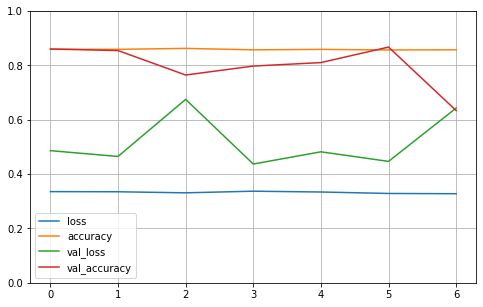

In [181]:
plot_acc_loss(history2)

At best result according to early stopping at val_loss: 0.4370 - val_accuracy: 0.7975, this is better than baseline.

# Regularization

## L1 0.01 + early stopping

In [201]:
def add_l1_l2_layer(classifier, units, regularizer, isFirst=False):
  if isFirst:
    classifier.add(Dense(units = units, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 12, kernel_regularizer=regularizer))
  else:
    classifier.add(Dense(units= units , kernel_initializer = 'he_uniform', activation = 'relu', kernel_regularizer=regularizer))
  return(classifier)

def create_model_l1(layer1=0, layer2=0, layer3=0):
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    if layer1==0:
      add_base_layer(classifier, 512, 0)
    else:
      add_l1_l2_layer(classifier, 512, keras.regularizers.l1(layer1), isFirst=True)
    # Second layer
    if layer2==0:
      add_base_layer(classifier, 128, 1)
    else:
      add_l1_l2_layer(classifier, 128, keras.regularizers.l1(layer2))
    # Third layer
    if layer3==0:
      add_base_layer(classifier, 96, 1)
    else:
      add_l1_l2_layer(classifier, 96, keras.regularizers.l1(layer3))
    # classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    add_base_layer(classifier, 2, 2)
    # classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model_l1_1 = create_model_l1(layer1 = 0.01)

model_l1_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l1_1_hist = model_l1_1.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 3ms/step - loss: 14.5295 - accuracy: 0.8248 - val_loss: 7.5262 - val_accuracy: 0.7683
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 3.9185 - accuracy: 0.8364 - val_loss: 1.9799 - val_accuracy: 0.8754
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 1.5532 - accuracy: 0.8411 - val_loss: 1.9061 - val_accuracy: 0.6606
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 1.1025 - accuracy: 0.8479 - val_loss: 1.2105 - val_accuracy: 0.7621
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.9483 - accuracy: 0.8352 - val_loss: 1.2505 - val_accuracy: 0.7089
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.8230 - accuracy: 0.8421 - val_loss: 0.8990 - val_accuracy: 0.7729
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.7153 - accuracy: 0.8493 - val_loss: 1.0236 - val_accuracy: 0.6668
Epoch

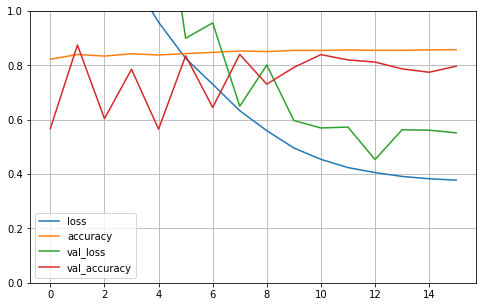

In [197]:
plot_acc_loss(model_l1_1_hist)

Although val_accuracy could reach as high as 0.8819, val_loss was 2.3870. Early stopping said that best result was reached at epoch 14, val_loss was 0.4551, val_accuracy 0.8085.

## L1 0.05 + early stopping

In [198]:
model_l1_2 = create_model_l1(layer1 = 0.05)

model_l1_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l1_2_hist = model_l1_2.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 3ms/step - loss: 63.6400 - accuracy: 0.8222 - val_loss: 26.9850 - val_accuracy: 0.6303
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 9.8255 - accuracy: 0.8353 - val_loss: 2.6773 - val_accuracy: 0.8432
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 1.9847 - accuracy: 0.8260 - val_loss: 1.9573 - val_accuracy: 0.5682
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 1.0632 - accuracy: 0.8443 - val_loss: 1.0082 - val_accuracy: 0.7527
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.6262 - accuracy: 0.8453 - val_loss: 0.8461 - val_accuracy: 0.7717
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.4696 - accuracy: 0.8521 - val_loss: 0.6525 - val_accuracy: 0.7621
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8544 - val_loss: 0.8213 - val_accuracy: 0.7284
Epoc

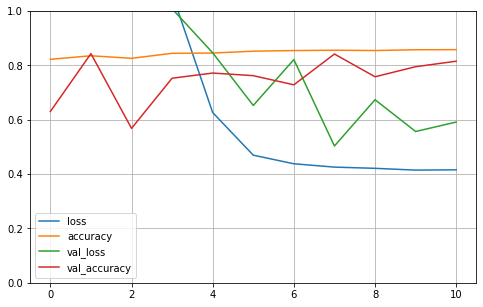

In [199]:
plot_acc_loss(model_l1_2_hist)

Early stopping said that best result was reached at epoch 8, val_loss was 0.5034, val_accuracy 0.8417. Increased L1 at layer 1 increased loss and accuracy.

# L1 0.01 + L1 0.01 + early stopping

In [202]:
model_l1_3 = create_model_l1(layer1 = 0.01, layer2 = 0.01)

model_l1_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l1_3_hist = model_l1_3.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 24.9321 - accuracy: 0.8078 - val_loss: 11.9000 - val_accuracy: 0.7371
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 6.8001 - accuracy: 0.8260 - val_loss: 4.2819 - val_accuracy: 0.5802
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 3.0036 - accuracy: 0.8210 - val_loss: 3.3244 - val_accuracy: 0.4891
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 1.9549 - accuracy: 0.8151 - val_loss: 2.4092 - val_accuracy: 0.4191
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 1.5806 - accuracy: 0.8094 - val_loss: 1.4775 - val_accuracy: 0.7193
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 1.2183 - accuracy: 0.8227 - val_loss: 1.9723 - val_accuracy: 0.4554
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 1.0675 - accuracy: 0.8289 - val_loss: 1.8643 - val_accuracy: 0.4975
Epoc

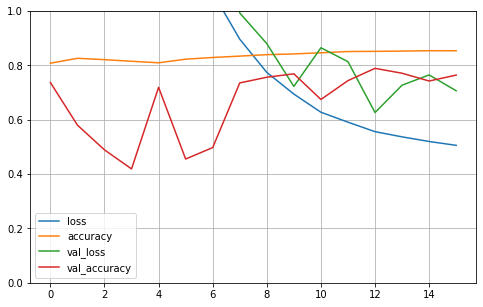

In [203]:
plot_acc_loss(model_l1_3_hist)

13 is best epoch according to early stopping, val_loss: 0.6264 - val_accuracy: 0.7890. Not only is loss a lot higher than only layer 1 L1 0.01, but accuracy is a lot lower as well.

L1 0.01 + L1 0.01 + L1 0.01 + early stopping

In [204]:
model_l1_4 = create_model_l1(layer1 = 0.01, layer2 = 0.01, layer3 = 0.01)

model_l1_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l1_4_hist = model_l1_4.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 32.0610 - accuracy: 0.8213 - val_loss: 15.2866 - val_accuracy: 0.8124
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 9.2431 - accuracy: 0.8386 - val_loss: 5.5586 - val_accuracy: 0.8516
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 4.1046 - accuracy: 0.8297 - val_loss: 3.9162 - val_accuracy: 0.4717
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 2.3794 - accuracy: 0.8302 - val_loss: 2.2879 - val_accuracy: 0.5639
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 1.6085 - accuracy: 0.8287 - val_loss: 1.7531 - val_accuracy: 0.6074
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 1.2077 - accuracy: 0.8399 - val_loss: 1.1255 - val_accuracy: 0.8593
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 0.9501 - accuracy: 0.8447 - val_loss: 1.0984 - val_accuracy: 0.7392
Epoc

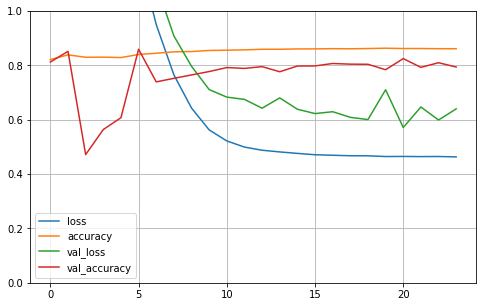

In [205]:
plot_acc_loss(model_l1_4_hist)

21 is best epoch according to early stopping, val_loss: 0.5714 - val_accuracy: 0.8249. By adding 0.01 L1 to all layers, and not just to layer 1 and 2, performance has improved.

In short, adding l1 to early stopping leads to higher validation loss. Validation accuracy is quite close to the original 0.7975, except in layer 1 0.05 L1, result was val_loss: 0.5034 - val_accuracy: 0.8417.

# L2 0.01 + early stopping

In [210]:
def create_model_l2(layer1=0, layer2=0, layer3=0):
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    if layer1==0:
      add_base_layer(classifier, 512, 0)
    else:
      add_l1_l2_layer(classifier, 512, keras.regularizers.l2(layer1), isFirst=True)
    # Second layer
    if layer2==0:
      add_base_layer(classifier, 128, 1)
    else:
      add_l1_l2_layer(classifier, 128, keras.regularizers.l2(layer2))
    # Third layer
    if layer3==0:
      add_base_layer(classifier, 96, 1)
    else:
      add_l1_l2_layer(classifier, 96, keras.regularizers.l2(layer3))
    # classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    add_base_layer(classifier, 2, 2)
    # classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model_l2_1 = create_model_l2(layer1 = 0.01)

model_l2_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_1_hist = model_l2_1.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 6.3107 - accuracy: 0.8262 - val_loss: 3.5723 - val_accuracy: 0.6596
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 2.0059 - accuracy: 0.8431 - val_loss: 1.2168 - val_accuracy: 0.8723
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.9910 - accuracy: 0.8486 - val_loss: 1.4726 - val_accuracy: 0.5882
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.7186 - accuracy: 0.8513 - val_loss: 0.9311 - val_accuracy: 0.7140
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.6205 - accuracy: 0.8475 - val_loss: 0.8737 - val_accuracy: 0.7541
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.8546 - val_loss: 0.6567 - val_accuracy: 0.7970
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.4976 - accuracy: 0.8499 - val_loss: 0.7783 - val_accuracy: 0.7036
Epoch 

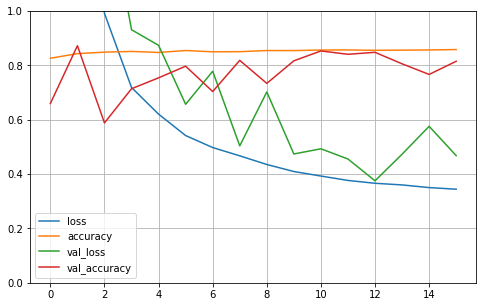

In [211]:
plot_acc_loss(model_l2_1_hist)

Adding L2 0.01 to layer 1 early stopping outperformed to only early stopping. Compared to the original best result val_loss: 0.4370 - val_accuracy: 0.7975, this model achieved val_loss: 0.3753 - val_accuracy: 0.8480 at epoch 13

# L2 0.05 + early stopping

In [212]:
model_l2_2 = create_model_l2(layer1 = 0.05)

model_l2_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_2_hist = model_l2_2.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 1s 3ms/step - loss: 26.3619 - accuracy: 0.8280 - val_loss: 10.6106 - val_accuracy: 0.7922
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 5.3637 - accuracy: 0.8438 - val_loss: 2.3691 - val_accuracy: 0.8725
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 1.5371 - accuracy: 0.8422 - val_loss: 1.6827 - val_accuracy: 0.5778
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.8583 - accuracy: 0.8468 - val_loss: 1.0111 - val_accuracy: 0.6567
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.6301 - accuracy: 0.8452 - val_loss: 0.9004 - val_accuracy: 0.7176
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.4972 - accuracy: 0.8502 - val_loss: 0.5270 - val_accuracy: 0.8167
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8521 - val_loss: 0.6422 - val_accuracy: 0.7036
Epoc

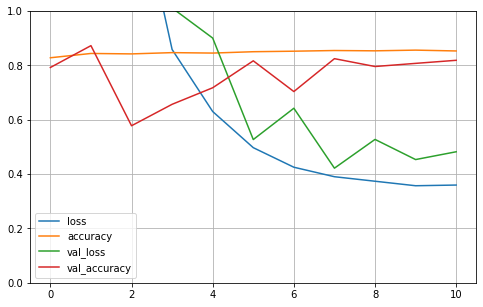

In [213]:
plot_acc_loss(model_l2_2_hist)

By increasing L2 to 0.05, compared to at only 0.01, validation loss increased but validation accuracy decrased. val_loss: 0.4612 - val_accuracy: 0.8386 compared to val_loss: 0.4217 - val_accuracy: 0.8246

# L2 0.01 + L2 0.01 + early stopping

In [214]:
model_l2_3 = create_model_l1(layer1 = 0.01, layer2 = 0.01)

model_l2_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_3_hist = model_l2_3.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 23.6568 - accuracy: 0.8190 - val_loss: 10.5195 - val_accuracy: 0.8133
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 6.1079 - accuracy: 0.8241 - val_loss: 3.4126 - val_accuracy: 0.8492
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 2.5986 - accuracy: 0.8207 - val_loss: 3.4372 - val_accuracy: 0.4838
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 1.7204 - accuracy: 0.8245 - val_loss: 1.6224 - val_accuracy: 0.6995
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 1.3859 - accuracy: 0.8225 - val_loss: 1.7879 - val_accuracy: 0.5338
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 1.1471 - accuracy: 0.8341 - val_loss: 1.6657 - val_accuracy: 0.5550
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 1.0021 - accuracy: 0.8335 - val_loss: 1.6481 - val_accuracy: 0.5793
Rest

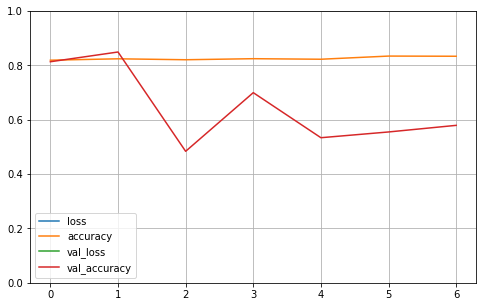

In [215]:
plot_acc_loss(model_l2_3_hist)

At best, val_loss: 1.6224 - val_accuracy: 0.6995. So, this is not a good model.

# L2 0.01 + L2 0.01 + L2 0.01 + early stopping

In [216]:
model_l2_4 = create_model_l1(layer1 = 0.01, layer2 = 0.01, layer3 = 0.01)

model_l2_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_4_hist = model_l2_4.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 31.7579 - accuracy: 0.8122 - val_loss: 15.4116 - val_accuracy: 0.7534
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 9.6718 - accuracy: 0.8289 - val_loss: 6.0161 - val_accuracy: 0.8670
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 4.6612 - accuracy: 0.8214 - val_loss: 4.4099 - val_accuracy: 0.4272
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 2.8813 - accuracy: 0.8259 - val_loss: 2.6708 - val_accuracy: 0.5643
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 1.9842 - accuracy: 0.8284 - val_loss: 2.5322 - val_accuracy: 0.4970
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 1.4726 - accuracy: 0.8363 - val_loss: 1.5161 - val_accuracy: 0.7279
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 1.1567 - accuracy: 0.8392 - val_loss: 1.5664 - val_accuracy: 0.6271
Epoc

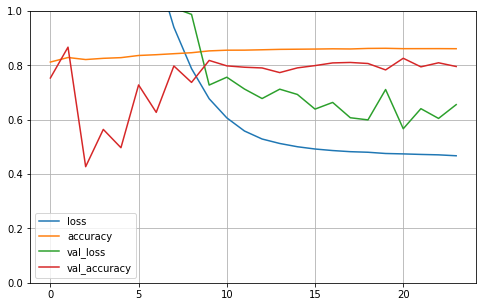

In [217]:
plot_acc_loss(model_l2_4_hist)

This is better than previous model, but still not the best. Performance still worse than layer 1 only L2 0.01, which had val_loss: 0.3753 - val_accuracy: 0.8480

In short, only adding L2 of 0.01 yield best result so far.

# Batch Normalization

# L2 0.01 + BN + early stopping

In [220]:
from keras.layers import BatchNormalization

def create_model_l2_BN(layer1=0, layer2=0, layer3=0, BN1=False, BN2=False, BN3=False):
    #Initializing Neural Network
    classifier = Sequential()

    ##Defining the architecture of ANN
   
    # First layer 
    if layer1==0:
      add_base_layer(classifier, 512, 0)
    else:
      add_l1_l2_layer(classifier, 512, keras.regularizers.l2(layer1), isFirst=True)
    if BN1:
      classifier.add(BatchNormalization())
    # Second layer
    if layer2==0:
      add_base_layer(classifier, 128, 1)
    else:
      add_l1_l2_layer(classifier, 128, keras.regularizers.l2(layer2))
    if BN2:
      classifier.add(BatchNormalization())
    # Third layer
    if layer3==0:
      add_base_layer(classifier, 96, 1)
    else:
      add_l1_l2_layer(classifier, 96, keras.regularizers.l2(layer3))
    if BN3:
      classifier.add(BatchNormalization())
    # classifier.add(Dense(units= 96, kernel_initializer = 'he_uniform', activation = 'relu'))
    # Adding the output layer
    add_base_layer(classifier, 2, 2)
    # classifier.add(Dense(units = 2, kernel_initializer = 'he_uniform', activation = 'softmax'))
    
    classifier.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier

model_l2_5 = create_model_l2_BN(layer1 = 0.01, BN1 = True)

model_l2_5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_5_hist = model_l2_5.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 4ms/step - loss: 5.3391 - accuracy: 0.8427 - val_loss: 2.4861 - val_accuracy: 0.6991
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 1.1386 - accuracy: 0.8526 - val_loss: 0.7922 - val_accuracy: 0.7991
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.8566 - val_loss: 0.6032 - val_accuracy: 0.7462
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8558 - val_loss: 0.6149 - val_accuracy: 0.7274
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8588 - val_loss: 0.6985 - val_accuracy: 0.7217
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3467 - accuracy: 0.8584 - val_loss: 0.6358 - val_accuracy: 0.7229
Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


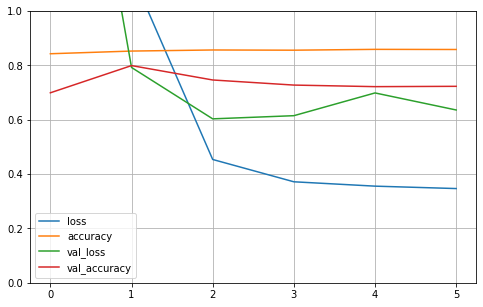

In [221]:
plot_acc_loss(model_l2_5_hist)

Best result for this model is val_loss: 0.6032 - val_accuracy: 0.7462. Adding BN to layer 1 does not improve result, which had val_loss: 0.3753 - val_accuracy: 0.8480

# L2 0.01 + BN + BN + early stopping

In [222]:
model_l2_6 = create_model_l2_BN(layer1 = 0.01, BN1 = True, BN2 = True)

model_l2_6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_6_hist = model_l2_6.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 5.4152 - accuracy: 0.8444 - val_loss: 2.3437 - val_accuracy: 0.7438
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 1.1524 - accuracy: 0.8539 - val_loss: 0.6145 - val_accuracy: 0.8576
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 0.4488 - accuracy: 0.8560 - val_loss: 0.4668 - val_accuracy: 0.8112
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3677 - accuracy: 0.8559 - val_loss: 0.4735 - val_accuracy: 0.8020
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3584 - accuracy: 0.8555 - val_loss: 0.5699 - val_accuracy: 0.7366
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3475 - accuracy: 0.8574 - val_loss: 0.3652 - val_accuracy: 0.8756
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8621 - val_loss: 0.5442 - val_accuracy: 0.7587
Epoch 

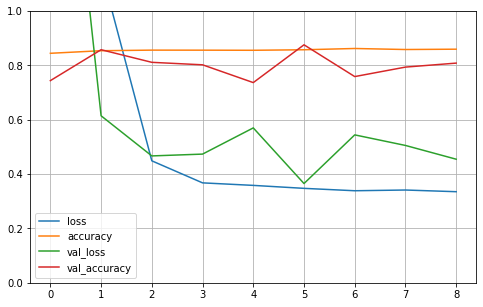

In [223]:
plot_acc_loss(model_l2_6_hist)

Best result for this model is val_loss: 0.3652 - val_accuracy: 0.8756. Adding BN to layer 1 and layer 2 improves result, which had val_loss: 0.3753 - val_accuracy: 0.8480

# L2 0.01 + BN + BN + BN + early stopping

In [224]:
model_l2_7 = create_model_l2_BN(layer1 = 0.01, BN1 = True, BN2 = True, BN3 = True)

model_l2_7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2_7_hist = model_l2_7.fit(X_train, y_train_cat, validation_split=0.25, epochs = 50,  batch_size = 32, callbacks=[early_stopping], verbose = 1)

Epoch 1/50
390/390 [==============================] - 2s 3ms/step - loss: 5.4509 - accuracy: 0.8463 - val_loss: 2.4507 - val_accuracy: 0.7140
Epoch 2/50
390/390 [==============================] - 1s 3ms/step - loss: 1.1674 - accuracy: 0.8551 - val_loss: 0.6295 - val_accuracy: 0.8542
Epoch 3/50
390/390 [==============================] - 1s 3ms/step - loss: 0.4571 - accuracy: 0.8537 - val_loss: 0.4195 - val_accuracy: 0.8302
Epoch 4/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8539 - val_loss: 0.6109 - val_accuracy: 0.7400
Epoch 5/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3580 - accuracy: 0.8561 - val_loss: 0.5478 - val_accuracy: 0.7481
Epoch 6/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3522 - accuracy: 0.8560 - val_loss: 0.3732 - val_accuracy: 0.8641
Epoch 7/50
390/390 [==============================] - 1s 3ms/step - loss: 0.3441 - accuracy: 0.8600 - val_loss: 0.4867 - val_accuracy: 0.8071
Epoch 

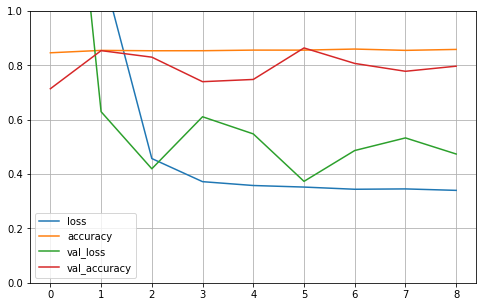

In [225]:
plot_acc_loss(model_l2_7_hist)

Adding batch normalization to all three layers worsened result slightly compared to adding it to only first two layers. val_loss: 0.3732 - val_accuracy: 0.8641 compared to val_loss: 0.3652 - val_accuracy: 0.8756

# Best result of val_loss: 0.3652 - val_accuracy: 0.8756 was obtained from L2 0.01 + BN + BN + early stopping